[*********************100%***********************]  1 of 1 completed


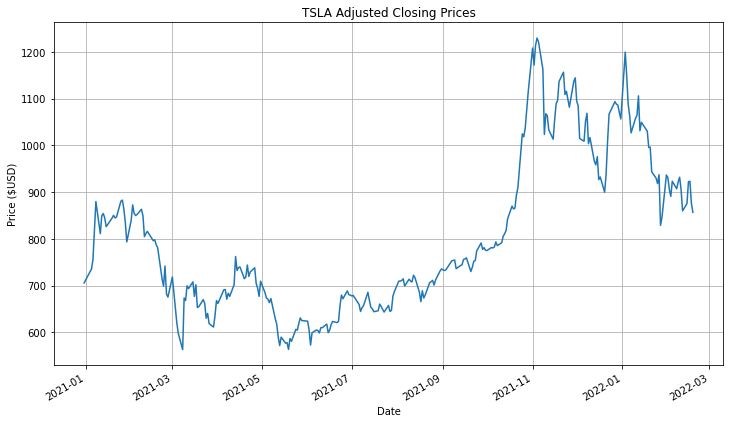

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

start = dt.datetime(2021,1,1)
end = dt.datetime(2022,3,1)

data = yf.download('TSLA', interval='1d', start='2021-01-01')
data['Adj Close'].plot(figsize=(12,7))
plt.title('TSLA Adjusted Closing Prices')
plt.ylabel('Price ($USD)')
plt.grid()
plt.show();

#### Simple Moving Average Crossover (No signals generated yet)

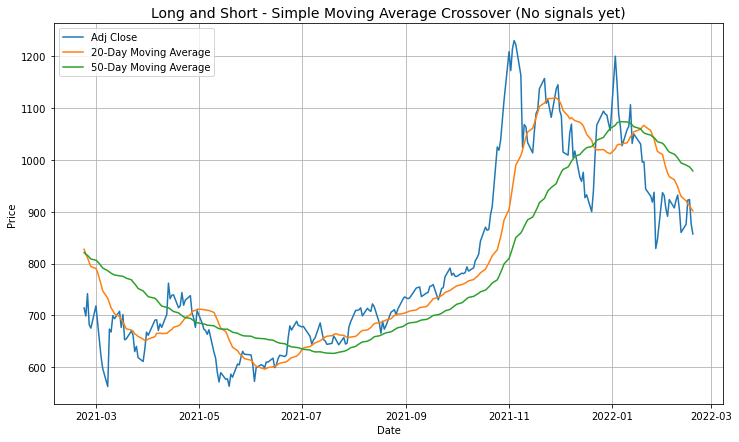

In [3]:
# Define long and short window 
short_window = 20
long_window = 50

# Create dataframe containing columns for 20-day and 50-day moving averages

# Calculate moving averages - .rolling().mean)()
data['20mA'] = data['Adj Close'].rolling(window = short_window, min_periods=1).mean()
data['50mA'] = data['Adj Close'].rolling(window = long_window, min_periods=1).mean()

# Plot close price and moving averages - 1Y granularity
plot_data = data[-253:]
plt.figure(figsize=(12, 7))
plt.title('Long and Short - Simple Moving Average Crossover (No signals yet)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(plot_data['Adj Close'], label='Adj Close')
plt.plot(plot_data['20mA'], label='20-Day Moving Average')
plt.plot(plot_data['50mA'], label='50-Day Moving Average')

plt.legend()
plt.grid()
plt.show();

#### Simple Moving Average Crossover (Signals generated)

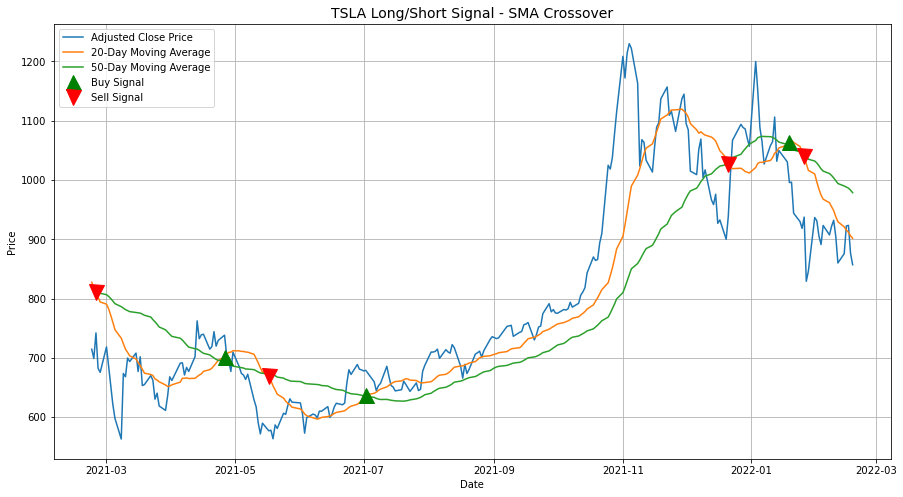

In [5]:
# CONCEPT:
# When 50mA > 200mA: LONG signal, i.e. signal = 1
# When50mA < 200mA: SHORT signal, i.e. signal = -1
# Buy signal = 1, Short signal = -1, neutral = 0

# Take long positions
data['Long Signal'] = np.where(data['20mA'] > data['50mA'], 1, 0) 

# Take short positions
data['Short Signal'] = np.where(data['20mA'] < data['50mA'], -1, 0)

data['Position'] = data['Long Signal'] + data['Short Signal']
data

# Plot adj closing prices and moving averages
plot_data = data[-253:]
# Setting figure size & headers
plt.figure(figsize=(15,8))
plt.title('TSLA Long/Short Signal - SMA Crossover', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting the legend labels
plt.plot(plot_data['Adj Close'], label = 'Adjusted Close Price')
plt.plot(plot_data['20mA'], label='20-Day Moving Average')
plt.plot(plot_data['50mA'], label='50-Day Moving Average')

# Plot Long signals
plt.plot(plot_data[
                (plot_data['Long Signal'] == 1) &
                        (plot_data['Long Signal'].shift(1) == 0)]['20mA'], 
                                '^', ms=15, label = 'Buy Signal', color = 'green')

# Plot Short signals
plt.plot(plot_data[
                (plot_data['Short Signal'] == -1) &
                        (plot_data['Short Signal'].shift(1) == 0)]['20mA'], 
                                'v', ms=15, label = 'Sell Signal', color = 'red')


plt.legend()
plt.grid()
plt.show();

#### Calculate Cumulative Returns (PnL)

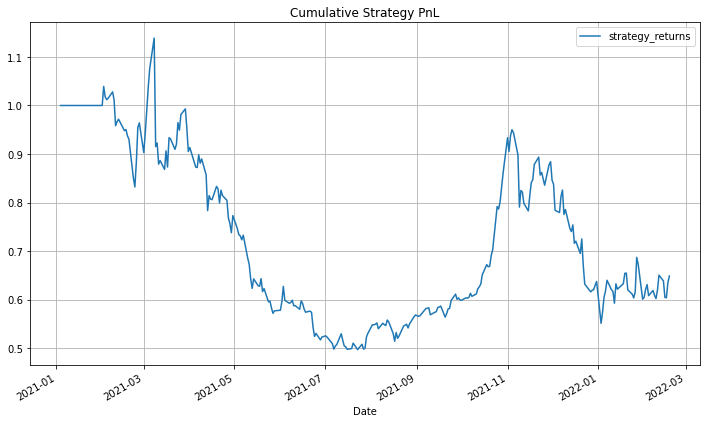

In [6]:
# Calculate daily returns

data['daily_returns'] = data['Adj Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['daily_returns'] * data['Position'].shift(1)

# # Plot cumulative returns
# Cumulative returns formula  = (Total Amount at the end - Total Initial amount) / Total Initial Amount] * 100%
cumulative_returns = data['strategy_returns'].add(1).cumprod()
cumulative_returns.plot(figsize=(12, 7))

plt.title('Cumulative Strategy PnL')

plt.legend()
plt.grid()
plt.show();